In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
'''checking data type of variables and we can see that many variables like 
price, size, installs have wrong data type. we need to check these 
variables'''
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
#checking shape of the data
df.shape

(10841, 13)

In [6]:
# checking null values of the data
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# dropping null value records from the dataset all at once
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
df.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

In [9]:
# removing dollar symbol to change the data type to float from object
df.Price=df.Price.map(lambda x:0 if x=='0' else float(x[1:]))

In [10]:
# checking if the data type is changed or not
df.Price.dtypes

dtype('float64')

In [11]:
# changing Reviews data type from object to int32
df.Reviews=df.Reviews.astype("int32")

In [12]:
df.Reviews.dtypes

dtype('int32')

In [13]:
df.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [14]:
df.Installs.value_counts()

Installs
1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [15]:
# Removing coma and + symbol from install feature. 
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [16]:
# calling the above defined function to change the data type from object to float
df.Installs=df.Installs.map(clean_installs)

In [17]:
# checking if The symbols are removed or not
df.Installs.value_counts()

Installs
1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: count, dtype: int64

In [18]:
df.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [19]:
# cleanng the size variable 
def change_Size(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return(x)
    elif 'k' == Size[:-1]:
        x= Size[:-1]
        x=float(x)
        return(x)
    else:
        return None

In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
# calling the function
df["Size"]= df["Size"].map(change_Size)

In [22]:
df.Size.dtype

dtype('float64')

In [23]:
df.Size.isnull().sum()

1894

In [24]:
df.head(40)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art_&_Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art_&_Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art_&_Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art_&_Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art_&_Design_Creativity,"July 3, 2018",2.8,4.0.3 and up


In [25]:
df.Size.unique()

array([ 19000.,  14000.,   8700.,  25000.,   2800.,   5600.,  29000.,
        33000.,   3100.,  28000.,  12000.,  20000.,  21000.,  37000.,
         5500.,  17000.,  39000.,  31000.,   4200.,  23000.,   6000.,
         6100.,   4600.,   9200.,   5200.,  11000.,  24000.,     nan,
         9400.,  15000.,  10000.,   1200.,  26000.,   8000.,   7900.,
        56000.,  57000.,  35000.,  54000.,   3600.,   5700.,   8600.,
         2400.,  27000.,   2700.,   2500.,   7000.,  16000.,   3400.,
         8900.,   3900.,   2900.,  38000.,  32000.,   5400.,  18000.,
         1100.,   2200.,   4500.,   9800.,  52000.,   9000.,   6700.,
        30000.,   2600.,   7100.,  22000.,   6400.,   3200.,   8200.,
         4900.,   9500.,   5000.,   5900.,  13000.,  73000.,   6800.,
         3500.,   4000.,   2300.,   2100.,  42000.,   9100.,  55000.,
         7300.,   6500.,   1500.,   7500.,  51000.,  41000.,  48000.,
         8500.,  46000.,   8300.,   4300.,   4700.,   3300.,  40000.,
         7800.,   88

In [26]:
df.Size.fillna(method='ffill',inplace=True)
df.Size.isnull().sum()

0

In [27]:
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [28]:
# checking length of reviews > installs as this is not possible.
len(df[df.Reviews>df.Installs])

7

In [29]:
# after cleaning 7 wrong records
df1=df[df.Reviews<df.Installs].copy()
df1.shape

(9351, 13)

In [30]:
# checking if the free app is costing anything or not
len(df[(df.Type=='Free')&(df.Price>0)])

0

In [31]:
# extracting only the numerical variables
num=df.select_dtypes(include='number')

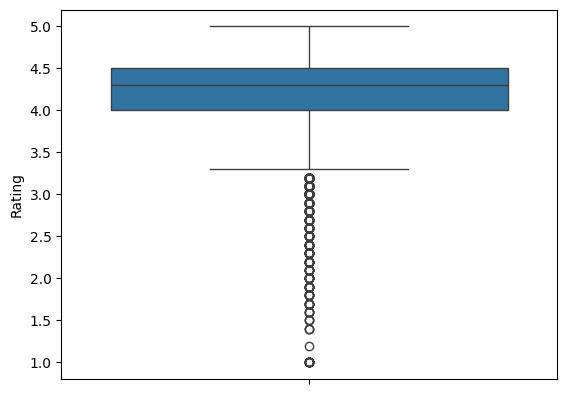

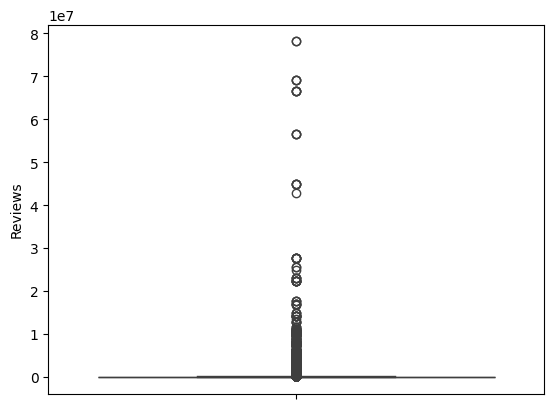

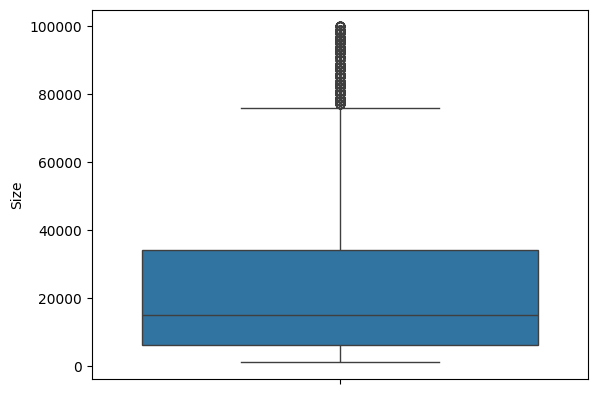

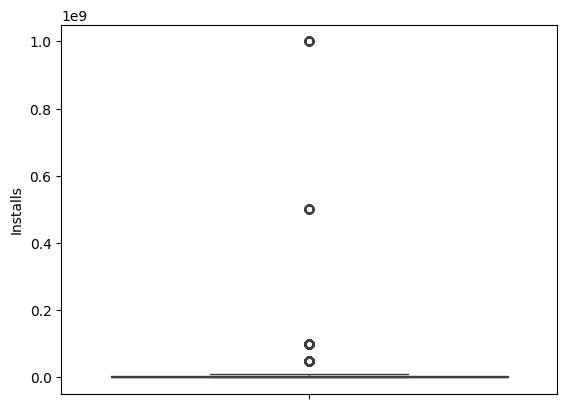

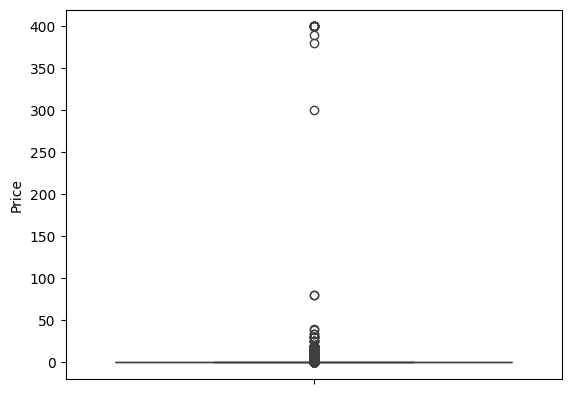

In [32]:
# checking outlier in every numerical variable
for i in num.columns:
    sns.boxplot(num[i])
    plt.show()

In [33]:
# removing outliers using iqr method all at once using for loop
for i in num.columns:
    q1=num[i].quantile(0.25)
    
    q3=num[i].quantile(0.75)
    
    iqr=q3-q1
    
    UB=q3+1.5*iqr
    
    LB=q1-1.5*iqr
    num[i]=np.where(num[i]<LB,LB,num[i])
    num[i]=np.where(num[i]>UB,UB,num[i])

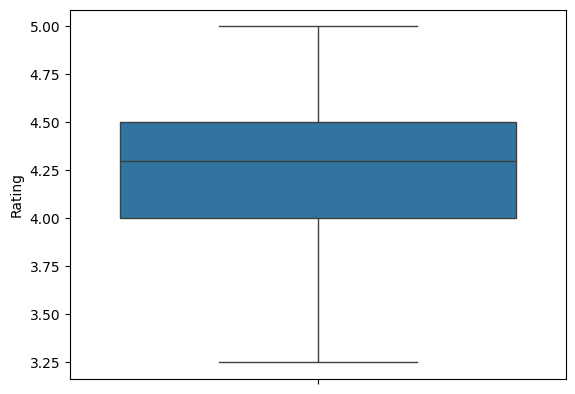

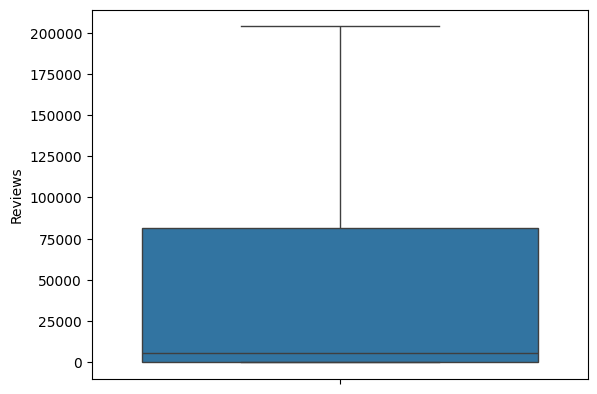

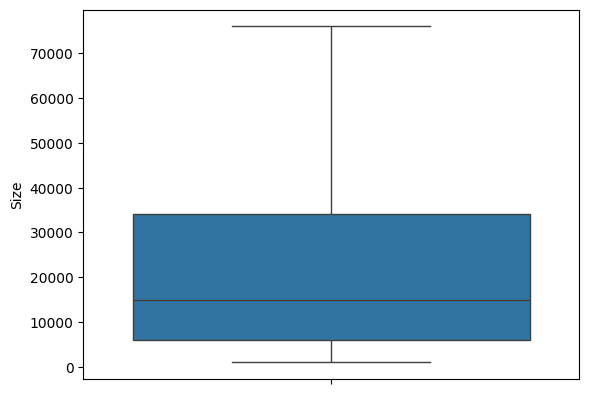

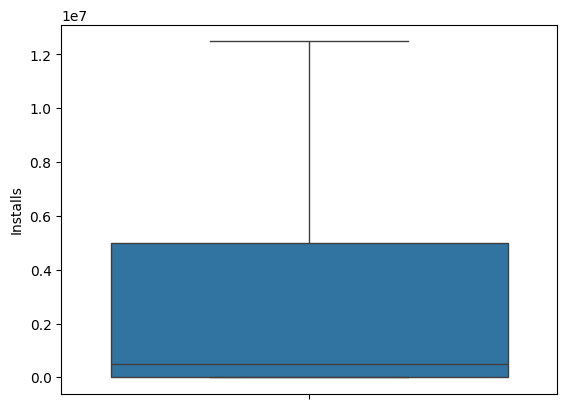

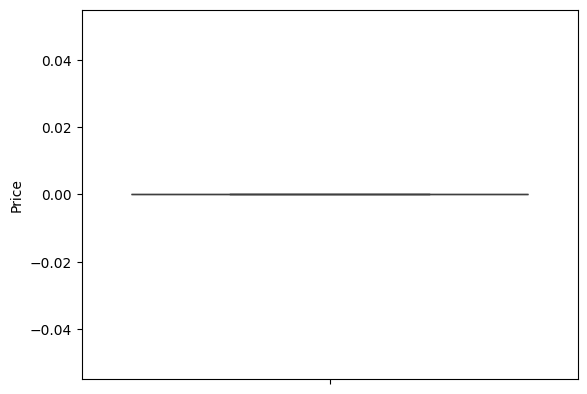

In [34]:
# checkin gwether the outliers have been removed or not
for i in num.columns:
    sns.boxplot(num[i])
    plt.show()

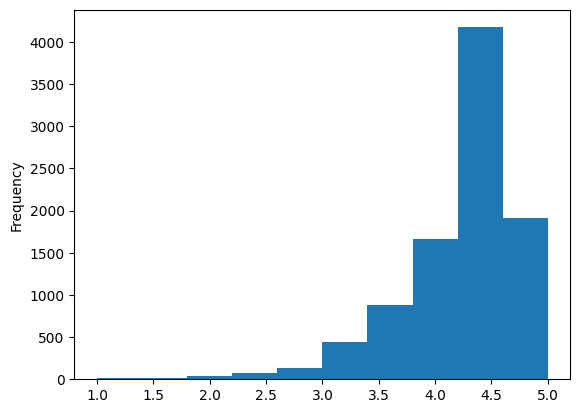

In [35]:
df.Rating.plot.hist()
plt.show()

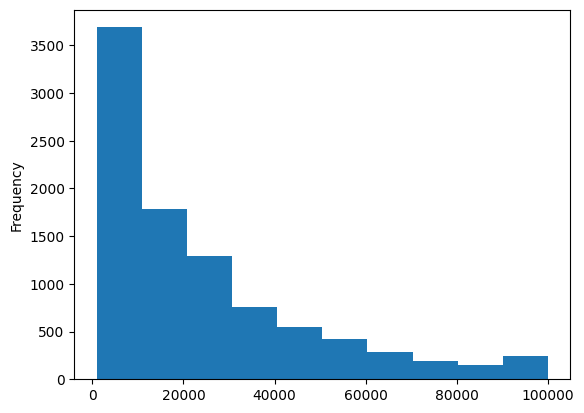

In [36]:
df['Size'].plot.hist()
plt.show()


In [37]:
# alternate method of removing outliers by filtering method instead of iqr method
len(df[df.Installs >= 1000000000]) 

58

In [38]:
df= df[df.Installs < 1000000000].copy() 
df.shape 

(9302, 13)

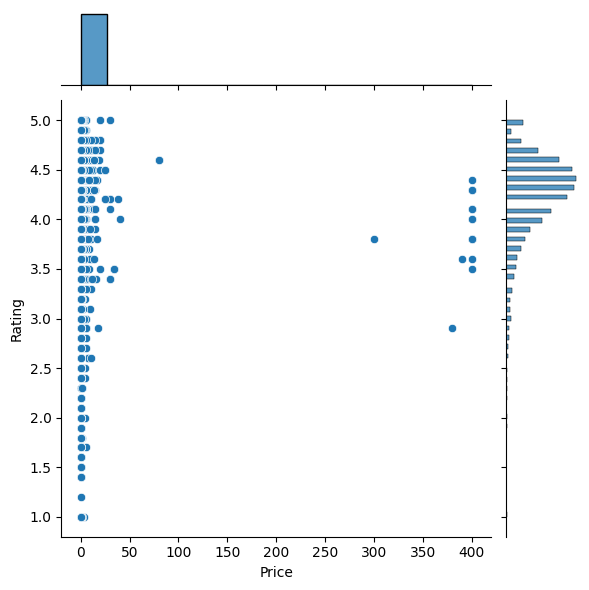

In [39]:
sns.jointplot(data=df,x=df.Price,y= df.Rating) # data visualisation

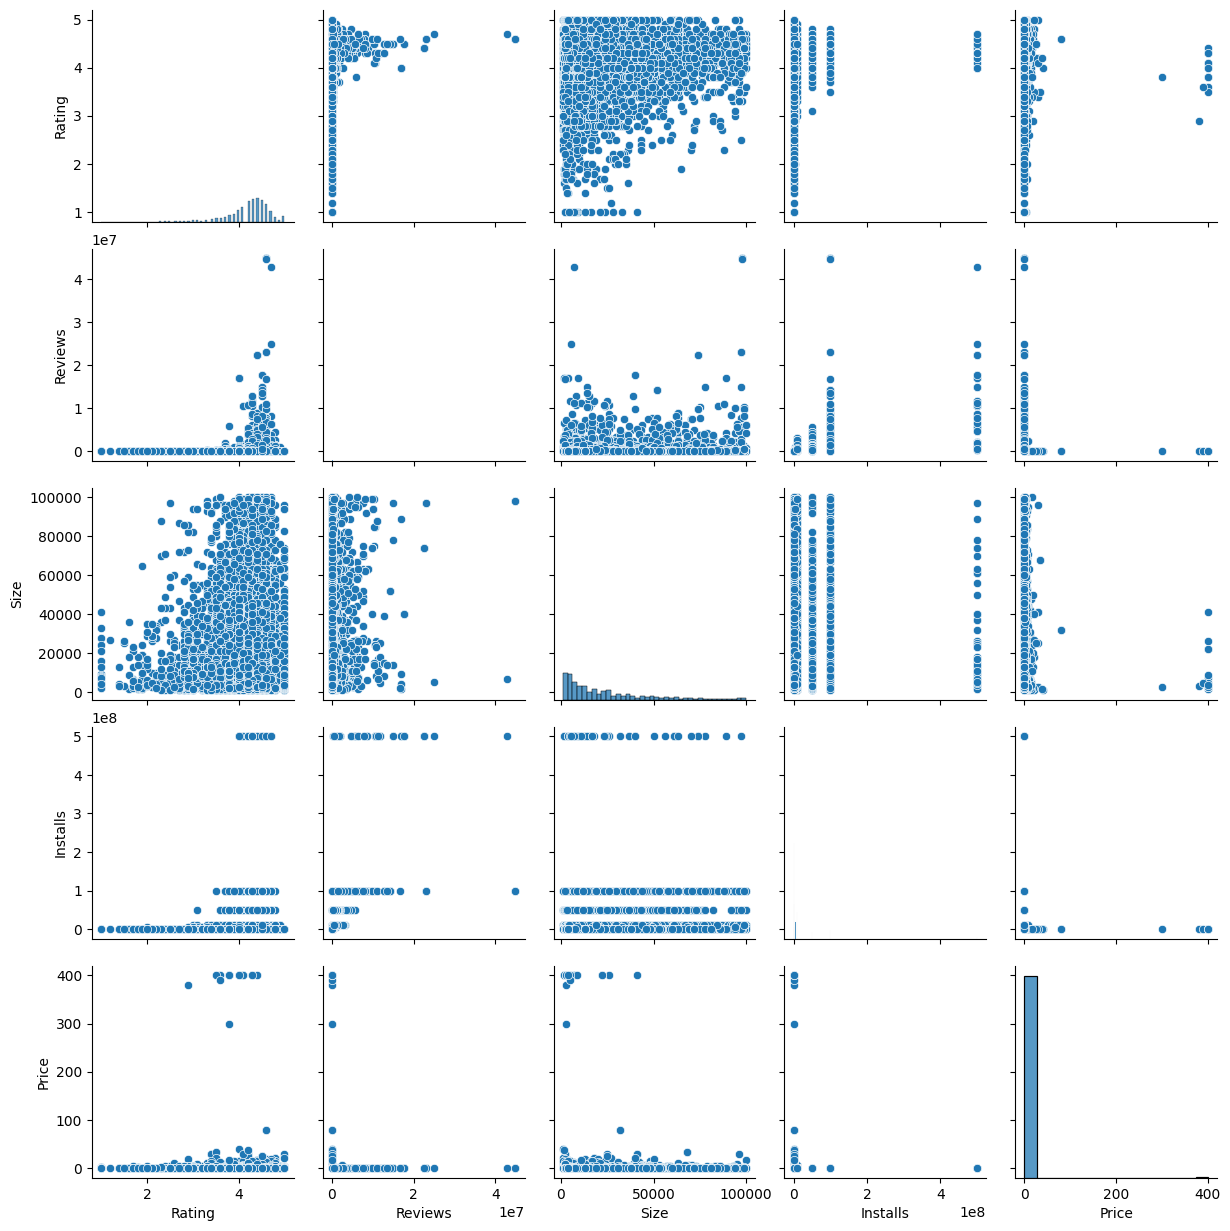

In [40]:
sns.pairplot(data=df) # checkin the relation between variables

<Axes: xlabel='Content_Rating', ylabel='Rating'>

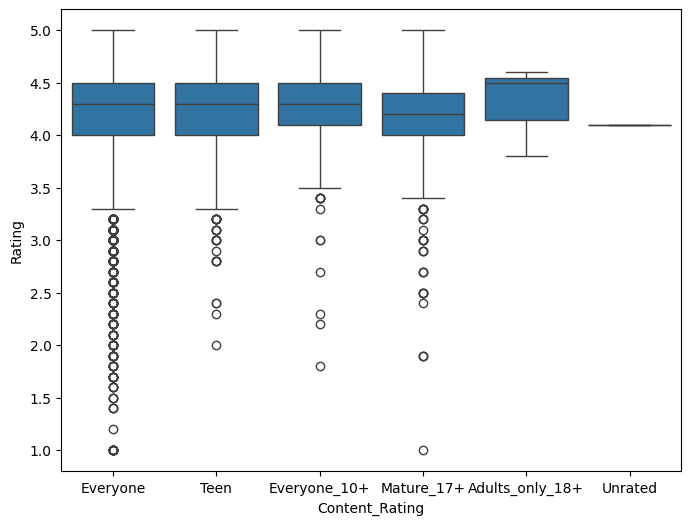

In [47]:
plt.figure(figsize=[8,6])
sns.boxplot(x=df['Content_Rating'],y=df.Rating)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

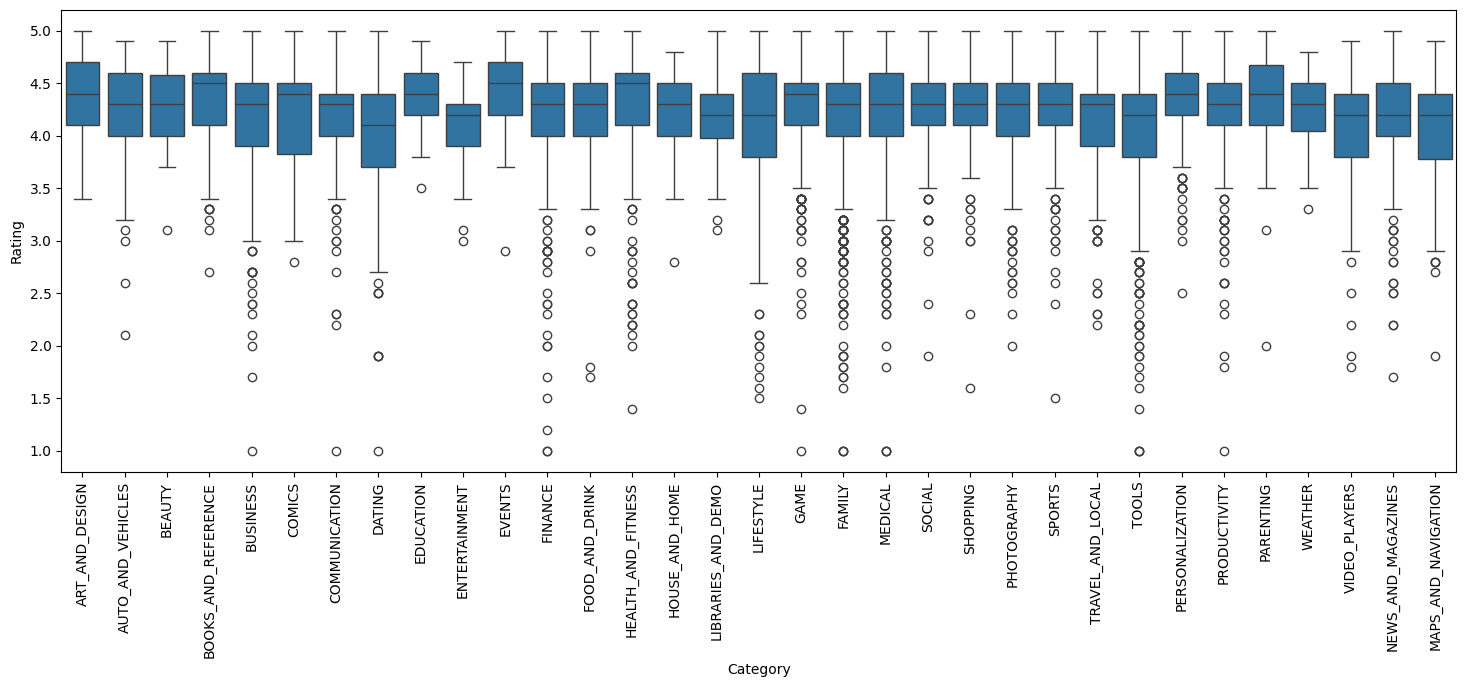

In [48]:
plt.figure(figsize=[18,6])
g=sns.boxplot(x=df.Category,y=df.Rating)
plt.xticks(rotation=90)

# preprocessing


In [49]:
df1=df.copy()

In [50]:
df1.skew(numeric_only=True)

Rating      -1.845309
Reviews     11.976481
Size         1.416946
Installs     8.288234
Price       24.318479
dtype: float64

In [51]:
df1.Installs=df1.Installs.apply(np.log1p)
df1.Reviews=df1.Reviews.apply(np.log1p)

In [52]:
df1.skew(numeric_only=True)

Rating      -1.845309
Reviews     -0.070092
Size         1.416946
Installs    -0.345701
Price       24.318479
dtype: float64

In [53]:
# dropping unnecessary columns
df1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)
df1.shape

(9302, 9)

In [54]:
df1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art_&_Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art_&_Design_Pretend_Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art_&_Design
3,ART_AND_DESIGN,4.5,12.281389,25000.0,17.727534,Free,0.0,Teen,Art_&_Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art_&_Design_Creativity


In [55]:
np.unique(df1.Category)

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [56]:
np.unique(df1.Genres)

array(['Action', 'Action_Action_&_Adventure', 'Adventure',
       'Adventure_Action_&_Adventure', 'Adventure_Brain_Games',
       'Adventure_Education', 'Arcade', 'Arcade_Action_&_Adventure',
       'Arcade_Pretend_Play', 'Art_&_Design', 'Art_&_Design_Creativity',
       'Art_&_Design_Pretend_Play', 'Auto_&_Vehicles', 'Beauty', 'Board',
       'Board_Action_&_Adventure', 'Board_Brain_Games',
       'Board_Pretend_Play', 'Books_&_Reference',
       'Books_&_Reference_Education', 'Business', 'Card',
       'Card_Action_&_Adventure', 'Card_Brain_Games', 'Casino', 'Casual',
       'Casual_Action_&_Adventure', 'Casual_Brain_Games',
       'Casual_Creativity', 'Casual_Education', 'Casual_Music_&_Video',
       'Casual_Pretend_Play', 'Comics', 'Comics_Creativity',
       'Communication', 'Communication_Creativity', 'Dating', 'Education',
       'Education_Action_&_Adventure', 'Education_Brain_Games',
       'Education_Creativity', 'Education_Education',
       'Education_Music_&_Video', 'Educ

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9302 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9302 non-null   object 
 1   Rating          9302 non-null   float64
 2   Reviews         9302 non-null   float64
 3   Size            9302 non-null   float64
 4   Installs        9302 non-null   float64
 5   Type            9302 non-null   object 
 6   Price           9302 non-null   float64
 7   Content_Rating  9302 non-null   object 
 8   Genres          9302 non-null   object 
dtypes: float64(5), object(4)
memory usage: 726.7+ KB


In [58]:
  np.unique(df1.Type)

array(['Free', 'Paid'], dtype=object)

In [59]:
# scaling the datset by one hot encoding technique
df3=pd.get_dummies(df1,drop_first=True)

In [60]:
df3.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,6.875232,14000.0,13.122365,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,11.379520,8700.0,15.424949,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,12.281389,25000.0,17.727534,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,6.875232,2800.0,11.512935,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df3.shape

(9302, 157)

In [62]:
cols=['Category','Content_Rating','Genres']

In [63]:
# using Label encoder method for scaling. 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1.Category = le.fit_transform(df1.Category)
df1.Content_Rating = le.fit_transform(df1.Content_Rating)
df1.Genres = le.fit_transform(df1.Genres)
df1.Type = le.fit_transform(df1.Type)

In [64]:
df1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,0,4.1,5.075174,19000.0,9.210440,0,0.0,1,9
1,0,3.9,6.875232,14000.0,13.122365,0,0.0,1,11
2,0,4.7,11.379520,8700.0,15.424949,0,0.0,1,9
3,0,4.5,12.281389,25000.0,17.727534,0,0.0,4,9
4,0,4.3,6.875232,2800.0,11.512935,0,0.0,1,10


In [65]:
# splitting the data 
x = df1.drop(['Rating'],axis=1)
y = df1.Rating

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [67]:
# calling the algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [68]:
# predicting the testing data
ypred = lr.predict(xtest)

In [69]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [70]:
ypred

array([4.17465273, 3.98453174, 4.45698951, ..., 4.20264419, 4.00626441,
       4.26280132])

In [71]:
mean_squared_error(ytest,ypred)

0.21907688907602102

In [72]:
r2_score(ytest,ypred)

0.13043637663852514

In [73]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(xtrain,ytrain)

Ridge()

In [74]:
yhat = ridge.predict(xtest)

In [75]:
mean_squared_error(ytest,yhat)

0.2190753644157043

In [76]:
r2_score(ytest,yhat)

0.13044242834555364

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(xtrain,ytrain)

Lasso()

In [78]:
yhat = lasso.predict(xtest)

In [79]:
mean_squared_error(ytest,yhat)

0.2509461014621927

In [80]:
r2_score(ytest,yhat)

0.00394057001521908

In [81]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(xtrain,ytrain)

ElasticNet()

In [82]:
yhat = en.predict(xtest)

In [83]:
mean_squared_error(ytest,yhat)

0.250843501346836

In [84]:
r2_score(ytest,yhat)

0.004347812095582659

In [85]:
x.head(1)

,Category,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,0,5.075174,19000.0,9.21044,0,0.0,1,9


In [86]:
new_data = [[0,5,19000,9.2,0,0,1,9]]

In [87]:
lr.predict(new_data)

array([4.11531256])

In [92]:
import pickle

In [93]:
pickle.dump(lr,open('LinearRegression.pkl','wb'))

In [95]:
pickle_model = pickle.load(open('LinearRegression.pkl','rb'))

In [96]:
pickle_model.predict(new_data)

array([4.11531256])